In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
os.environ["OMP_NUM_THREADS"] = "4"


In [3]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Ma'lumotlarni tozalash
Address ustuni matnli. Masofa hisoblashda esa bu ustundan foydalan olmaymiz, shuning bu ustunni tashglab yuboramiz.

In [6]:
df.drop('Address', axis = 1, inplace = True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Normalizatsiya
Customer Id ustunidan boshqa barcha ustunlarni normalizasiya qilamiz.

In [12]:
from sklearn.preprocessing import StandardScaler
X = df.values[:, 1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Model
Dataset turli mijozlarning yoshi, ishlagan yillar soni, daromadi, qarzi ka'bi ma'lumotlardan iborat. Maqsadimiz shu ma'lumotlardan foydalangan holda mijozlarni truli klasterlarga ajratish.

In [30]:
k = 3
k_means = KMeans(n_clusters = k, n_init=10)
k_means.fit(norm_data)
print(k_means.labels_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[1 0 2 1 0 0 1 1 1 0 2 1 1 1 2 1 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 0 2 1 1 1 2
 2 1 0 2 0 1 0 1 0 1 1 1 1 0 0 2 1 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 0 1 1 2 0 1 0 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2
 1 1 1 0 2 1 1 1 1 0 2 2 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 2 0 2 1 1 0 2
 0 1 1 1 1 1 0 1 2 1 1 1 0 0 1 0 1 2 1 1 2 1 0 1 2 1 1 1 1 1 2 2 0 1 1 2 0
 1 1 1 1 0 1 1 2 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 2 1 2 1
 1 1 0 1 2 0 2 1 0 1 1 2 1 1 1 1 2 2 2 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 2 1 1
 2 1 2 0 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 1 0 2
 1 1 2 1 0 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 2 1 2 1 1 1 0 0 1
 2 1 0 2 2 1 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 1 1 1 2 1 1 2 2
 0 1 1 1 1 1 2 2 1 0 2 0 1 1 2 1 1 0 0 1 2 1 1 0 1 2 1 0 1 1 1 0 1 1 1 1 0
 1 2 1 1 1 1 0 2 1 1 0 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1
 2 1 1 1 1 1 0 2 2 1 0 1 

In [19]:
df['cluster'] = k_means.labels_
df.head(8)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,1
6,7,38,2,4,56,0.442,0.454,0.0,1.6,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,0


# Klasterlar haqida nima deya olamiz?
Har bir klaster sentrodini topish orqali klasterlar haqida ma'lumot olishimiz mumkin. Buning uchun esa groupby va mean funksiyalaridan foydalanamiz

In [23]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


Har bir klasterdagi mijozlar haqida qanday xulosa qilish mumkin?

Masalan, yoshiga (`Age`) qaraydigan bo'lsak 0-klaster katta yoshlar (43+), 1-klaster o'rta yosh (33+), 2-klaster yoshlar (31 gacha).

Har bir klasterni yaqqol ajratib turuvchi ustunlar bu `Income` (daromad) va `Year Employed` (necha yildan beri ishlashi) ekan.

Demak biz har klasterni quyidagicha ta'riflashimiz mumkin:
- 0-klaster - Katta yosh, uzoq tajribaga ega, katta daromad qiluvchi mijozlar.
- 1-klaster - Yosh, kam tajriba va kam daromad mijozlar.
- 2-klaster - O'rta yosh, 7+ yil tarjibaga ega, kam daromad mijozlar.



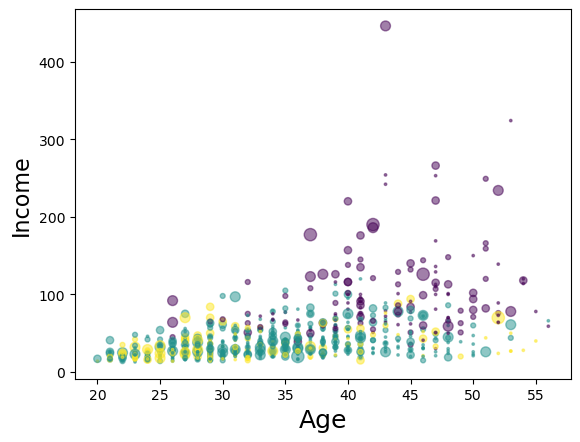

In [32]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()